## Handwritten digits classifier - Keras

## Imports

In [18]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD 
from keras.models import load_model
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## Constants

In [19]:
NO_OF_CLASSESS=10
VALIDATION_SIZE=10000
IMAGE_WIDTH=28
IMAGE_HEIGHT=28
NO_OF_CHANNELS=1  # ONLY BLACK AND WHITE
TOTAL_INPUTS = IMAGE_HEIGHT*IMAGE_WIDTH

In [20]:
# Loading data from mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


In [21]:
print("Number of samples in training set:",len(x_train))
print("Number of samples in testing set:",len(x_test))

Number of samples in training set: 60000
Number of samples in testing set: 10000


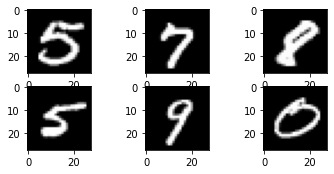

In [22]:
# Check the dataset
for i in range(6):
    plt.subplot(330+i+1)
    rand_num=np.random.randint(0,len(x_train))
    plt.imshow(x_train[rand_num], cmap=plt.get_cmap('gray'))
plt.show()

In [23]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Keras need 4th dimension for colour
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the data
x_train /= 255
x_test /= 255

In [24]:
y_train=np.eye(NO_OF_CLASSESS)[y_train]
y_test=np.eye(NO_OF_CLASSESS)[y_test]

In [25]:
num_pixels = x_train.shape[1] * x_train.shape[2]
num_pixels

784

# Model CNN
- We're constructing a simple but effective CNN that uses 32 filters of size 3x3
- We've added a 2nd CONV layer of 64 filters of the same size 3x2
- We then downsample our data to 2x2, here he apply a dropout where p is set to 0.25
- We then flatten our Max Pool output that is connected to a Dense/FC layer that has an output size of 128
- How we apply a dropout where P is set to 0.5
- Thus 128 output is connected to another FC/Dense layer that outputs to the 10 categorical units

In [26]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))  # Layers
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # Reduces the dimensionalty
model.add(Dropout(0.25))  # To avoid overfitting
model.add(Flatten())  # Multidim to vector
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NO_OF_CLASSESS, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

## Training our model

In [27]:
%%time
batch_size = 30
epochs = 10

history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
2000/2000 [==============================] - 66s 33ms/step - loss: 0.5953 - accuracy: 0.8155 - val_loss: 0.1986 - val_accuracy: 0.9415
Epoch 2/10
2000/2000 [==============================] - 72s 36ms/step - loss: 0.2857 - accuracy: 0.9130 - val_loss: 0.1344 - val_accuracy: 0.9598
Epoch 3/10
2000/2000 [==============================] - 75s 37ms/step - loss: 0.2113 - accuracy: 0.9364 - val_loss: 0.0986 - val_accuracy: 0.9699
Epoch 4/10
2000/2000 [==============================] - 75s 37ms/step - loss: 0.1663 - accuracy: 0.9509 - val_loss: 0.0789 - val_accuracy: 0.9737
Epoch 5/10
2000/2000 [==============================] - 76s 38ms/step - loss: 0.1374 - accuracy: 0.9592 - val_loss: 0.0656 - val_accuracy: 0.9779
Epoch 6/10
2000/2000 [==============================] - 71s 35ms/step - loss: 0.1173 - accuracy: 0.9647 - val_loss: 0.0564 - val_accuracy: 0.9814
Epoch 7/10
2000/2000 [==============================] - 74s 37ms/step - loss: 0.1067 - accuracy: 0.9679 - val_loss: 0.0522 -

In [28]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0447133406996727
Test accuracy: 0.9847999811172485


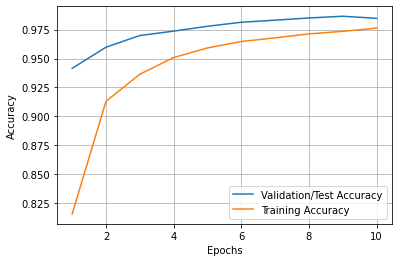

In [29]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [30]:
print(history.history)

{'loss': [0.5952909588813782, 0.2857043147087097, 0.2113138884305954, 0.16633106768131256, 0.13738134503364563, 0.11729725450277328, 0.10669515281915665, 0.09560863673686981, 0.08966812491416931, 0.07932985574007034], 'accuracy': [0.8154500126838684, 0.9129666686058044, 0.9363833069801331, 0.9508500099182129, 0.9591500163078308, 0.9647166728973389, 0.9678999781608582, 0.9713000059127808, 0.9735333323478699, 0.9763166904449463], 'val_loss': [0.19861125946044922, 0.13436196744441986, 0.09863774478435516, 0.07887998968362808, 0.06556203216314316, 0.05640965700149536, 0.05224393308162689, 0.047413043677806854, 0.04249778017401695, 0.04471337050199509], 'val_accuracy': [0.9415000081062317, 0.9598000049591064, 0.9699000120162964, 0.9736999869346619, 0.9779000282287598, 0.9814000129699707, 0.9832000136375427, 0.9850999712944031, 0.9865999817848206, 0.9847999811172485]}


In [31]:
# Saving the model
model.save("C:/Users/LENOVO/DeepLearningCV/trained_model1.h5")
# h5 is heirarchical data format

In [32]:
# Load the classifier
classifier = load_model('C:/Users/LENOVO/DeepLearningCV/trained_model1.h5')

In [33]:
def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (255,255,0), 2)
    cv2.imshow(name, expanded_image)

for i in range(0,5):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1) 

    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])

    draw_test("Prediction", res, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
